* [Company Summary Variables List](https://api.census.gov/data/2019/abscs/variables.html) <br/><br/>
* [Company Summary Documentation](https://www2.census.gov/programs-surveys/abs/technical-documentation/api/API2019-company-summary-1-26-2021.pdf)

In [1]:
# COMPANY SUMMARY DATA
import matplotlib.pyplot as plt
import pandas as pd

# NUMBER OF EMPLOYEES BY INDUSTRY
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE
labels = 'EMP,NAICS2017,NAICS2017_LABEL'

data_group = '&for=us'  # FOR ENTIRE USA
# data_group = '&for=metropolitan%20statistical%20area/micropolitan%20statistical%20' # FOR METROPOLITAN AREAS
# data_group = '&for=state' # FOR STATES

# Set area = '' for USA and US STATES
# area = 'area:12060'
area = ''


NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df.drop('us',axis=1,inplace=True)
df['EMP'] = df['EMP'].astype(int)
template = df.copy()
df = df.loc[df['NAICS2017']=='00']
df

,EMP,NAICS2017,NAICS2017_LABEL
1,128196406,00,Total for all sectors


In [2]:
df = template.copy()
df = df.loc[df['NAICS2017']!='00'].sort_values(by='EMP',ascending=False).head(10)
df

,EMP,NAICS2017,NAICS2017_LABEL
16,19123446,62,Health care and social assistance
7,15875876,44-45,Retail trade
18,14275081,72,Accommodation and food services
14,12694998,56,Administrative and support and waste managemen...
5,12006094,31-33,Manufacturing
12,9356647,54,"Professional, scientific, and technical services"
4,6754898,23,Construction
10,6643953,52,Finance and insurance
6,6109303,42,Wholesale trade
8,5049216,48-49,Transportation and warehousing


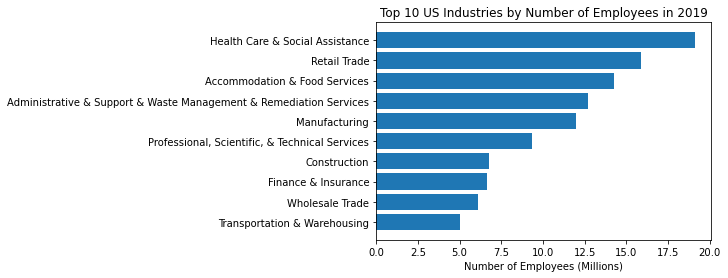

In [3]:
df = template.copy()
df = df.loc[df['NAICS2017']!='00']

df['NAICS2017_LABEL'] = df['NAICS2017_LABEL'].apply(lambda x:(x.replace('and','&')).title())
df['EMP'] = df['EMP'].apply(lambda x:float(x/1_000_000))

sorted_totals = df[['NAICS2017_LABEL','EMP']].sort_values(by = 'EMP',ascending=True)

ax = plt.barh(sorted_totals['NAICS2017_LABEL'].tail(10),sorted_totals['EMP'].tail(10));
plt.title('Top 10 US Industries by Number of Employees in 2019')
plt.xlabel('Number of Employees (Millions)');




In [4]:
labels = 'EMP,RACE_GROUP,RACE_GROUP_LABEL'

data_group = '&for=us'  # FOR ENTIRE USA

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df.drop('us',axis=1,inplace=True)
df['EMP'] = df['EMP'].astype(int)
df = df.loc[df['RACE_GROUP']!='00'].sort_values(by='EMP',ascending=False)
df = df.loc[(df['RACE_GROUP_LABEL']!='Nonminority') & (df['RACE_GROUP_LABEL']!='Minority') & (df['RACE_GROUP_LABEL']!='Equally minority/nonminority')]
df.drop('RACE_GROUP',axis=1,inplace=True)
template = df.copy()
df

,EMP,RACE_GROUP_LABEL
3,56877432,White
5,5090065,Asian
2,1188819,Black or African American
4,200256,American Indian and Alaska Native
7,54446,Native Hawaiian and Other Pacific Islander


In [5]:
labels = 'NAME,FIRMPDEMP'

data_group = '&for=us'

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df


,NAME,FIRMPDEMP,us
1,United States,5722142,1


In [6]:
labels = 'NAME,FIRMPDEMP'

data_group = '&for=state'

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df = df[['NAME','FIRMPDEMP']].sort_values(by='FIRMPDEMP',ascending=False)
df.head(10)


,NAME,FIRMPDEMP
32,California,738370
37,Florida,447363
9,New York,446155
20,Texas,425425
41,Illinois,245445
15,Pennsylvania,214291
7,New Jersey,187243
38,Georgia,174985
12,Ohio,170951
10,North Carolina,167837


In [7]:
df.tail(10)

,NAME,FIRMPDEMP
40,Hawaii,23687
25,West Virginia,23369
16,Rhode Island,22900
18,South Dakota,21641
11,North Dakota,19844
34,Delaware,19663
27,Wyoming,17113
21,Vermont,16471
29,Alaska,15698
35,District of Columbia,15418


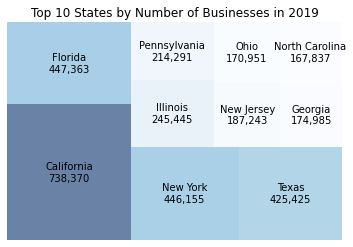

In [8]:
import matplotlib
import squarify
cmap = matplotlib.cm.Blues

minimum=min(df['FIRMPDEMP'].head(10))
maximum=max(df['FIRMPDEMP'].head(10))
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)
labels = [f'{State}\n{"{:,}".format(count)}' for State, count in zip(df.NAME, df.FIRMPDEMP)]

colors = [cmap(norm(value)) for value in df['FIRMPDEMP'].head(10)]
squarify.plot(sizes=df['FIRMPDEMP'].head(10), label=labels, alpha=0.6, color = colors)
plt.title('Top 10 States by Number of Businesses in 2019')
plt.axis('off')
plt.show()

In [9]:
labels = 'YIBSZFI,YIBSZFI_LABEL,FIRMPDEMP'

data_group = '&for=us'  # FOR ENTIRE USA

area = ''

NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df.drop('us',axis=1,inplace=True)
df.drop('YIBSZFI',axis=1,inplace=True)
df = df.loc[df['YIBSZFI_LABEL']!='All firms']

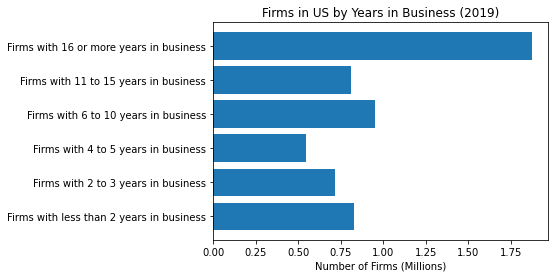

In [10]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df['FIRMPDEMP'] = df['FIRMPDEMP'].apply(lambda x:float(x/1_000_000))
plt.barh(df['YIBSZFI_LABEL'],df['FIRMPDEMP'])
plt.xlabel('Number of Firms (Millions)')
plt.title('Firms in US by Years in Business (2019)');

In [50]:
# BUSINESS OWNER MERGE
labels = 'NAME,OWNER_RACE,OWNER_RACE_LABEL,OWNPDEMP'

data_group = '&for=us:'  # FOR ENTIRE USA
#data_group = '&for=state:' # FOR STATES


description =f'*&QDESC_LABEL=YRACQBUS'
API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscbo?get={labels}{data_group}{description}{API_key}')

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header


# NUMBER OF EMPLOYEES BY INDUSTRY
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE
labels = 'NAME,EMP,NAICS2017,NAICS2017_LABEL'

data_group = '&for=us'  # FOR ENTIRE USA
# data_group = '&for=metropolitan%20statistical%20area/micropolitan%20statistical%20' # FOR METROPOLITAN AREAS
# data_group = '&for=state' # FOR STATES

# Set area = '' for USA and US STATES
# area = 'area:12060'
area = ''

NAICS2017_value = ''

API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

mf = pd.read_json(f'https://api.census.gov/data/2018/abscs?get={labels}{data_group}{area}{NAICS2017_value}{API_key}')
new_header = mf.iloc[0] #grab the first row for the header
mf = mf[1:] #take the data after the header row
mf.columns = new_header #set the header row as the df header


merged = df.merge(mf,how='inner',on='NAME')
merged.drop('NAME',axis=1,inplace=True)
merged.drop('OWNER_RACE',axis=1,inplace=True)
merged.drop('QDESC_LABEL',axis=1,inplace=True)
merged.drop('us_x',axis=1,inplace=True)
merged.drop('us_y',axis=1,inplace=True)
merged = merged.loc[merged['NAICS2017']=='00']
merged.drop('NAICS2017',axis=1,inplace=True)
merged


,OWNER_RACE_LABEL,OWNPDEMP,EMP,NAICS2017_LABEL
0,American Indian and Alaska Native,372,128196406,Total for all sectors
21,All owners of respondent firms,146045,128196406,Total for all sectors
42,White,140242,128196406,Total for all sectors
63,Black or African American,1224,128196406,Total for all sectors
84,Asian,4497,128196406,Total for all sectors
105,Native Hawaiian and Other Pacific Islander,136,128196406,Total for all sectors
126,Minority,9261,128196406,Total for all sectors
147,Nonminority,136785,128196406,Total for all sectors
